In [2]:
!pip install simpy


In [ ]:
'''
import simpy
import matplotlib.pyplot as plt
import numpy as np
import random

# Константы
max_time = 100.0   # Общее время моделирования
mu = 2             # Среднее время обслуживания
lambda_ = [100, 150, 200]  # Средние интенсивности поступления заявок для трех потоков
seed = 12345       # Начальное значение генератора случайных чисел
capacity = 10000       # Емкость сервера (один сервер)

# Переменные для отслеживания данных во время моделирования
number_of_task = {}    # Количество заявок в системе по времени
moving_average = {}    # Скользящее среднее количества заявок в системе

def process_request(env, server,  number_of_task, moving_average, mu):
    """
    Процесс обработки заявки

    Args:
        env: Окружение SimPy.
        server: Ресурс SimPy (сервер) для обслуживания заявок.
        number_of_task: Словарь с количеством заявок по времени.
        moving_average: Словарь со скользящим средним количества заявок по времени.
        mu: Средняя интенсивность обслуживания заявки

    Yields:
        Событие обслуживания заявки.
    """
    with server.request() as req:
        yield req
        number_of_task[env.now] = server.count
        moving_average[env.now] = sum(number_of_task.values()) / len(number_of_task.values())
        service_time = random.expovariate(mu)
        yield env.timeout(service_time)
        number_of_task[env.now] = server.count
        moving_average[env.now] = sum(number_of_task.values()) / len(number_of_task.values())

def generate_requests(env, server, stream_lambda, number_of_task, moving_average, mu):
    """
    Генератор заявок из нескольких потоков.

    Args:
        env: Окружение SimPy.
        server: Ресурс SimPy (сервер) для обслуживания заявок.
        stream_lambda: Средняя интенсивность поступления заявок.

    Yields:
        Событие поступления новой заявки.
    """
    while True:
        c = process_request(env, server, number_of_task, moving_average, mu)
        env.process(c)
        inter_arrival_time = random.expovariate(stream_lambda)
        yield env.timeout(inter_arrival_time)

def run_simulation(max_time, mu, lambda_, seed, capacity):
    """
    Запуск имитационной модели системы M|M|inf.

    Args:
        max_time: Максимальное время моделирования.
        mu: Среднее время обслуживания.
        lambda_: Средние интенсивности поступления заявок для трех потоков.
        seed: Начальное значение генератора случайных чисел.
        capacity: Емкость сервера.

    Returns:
        env: Объект окружения SimPy.
        server: Ресурс SimPy (сервер) для обслуживания заявок.
    """
    print('System M|M|inf')
    random.seed(seed)
    env = simpy.Environment()
    server = simpy.Resource(env, capacity=capacity)
    for stream_lambda in lambda_:
        env.process(generate_requests(env, server, stream_lambda, number_of_task, moving_average, mu))
    env.run(until=max_time)
    print('All done!')

    return env, server

def plot_results(number_of_task, moving_average, max_time, lambda_, mu):
    """
    Построение графиков результатов моделирования.

    Args:
        number_of_task: Словарь с количеством заявок по времени.
        moving_average: Словарь со скользящим средним количества заявок по времени.
        max_time: Максимальное время моделирования.
        lambda_: Средние интенсивности поступления заявок для трех потоков.
        mu: Среднее время обслуживания.
    """
    # Построение графика временных рядов
    plt.figure(figsize=(10, 6))
    plt.plot(number_of_task.keys(), number_of_task.values(), label='Случайный процесс', color='lightblue')
    plt.plot(moving_average.keys(), moving_average.values(), label='Скользящее среднее', color='red')
    plt.plot(number_of_task.keys(), [np.sum(lambda_) / mu for _ in number_of_task.keys()], label='Теоретическое среднее', color='green')
    plt.xlim(0, max_time)
    plt.ylim(0, max(max(number_of_task.values()), max(moving_average.values())) + 10)
    plt.grid(linestyle='--', alpha=0.5)
    plt.xlabel('Время')
    plt.ylabel('Количество заявок')
    plt.title('Динамика заявок в системе M|M|inf')
    plt.legend()
    plt.show()

    # Построение гистограммы
    plt.figure(figsize=(10, 6))
    plt.hist(list(number_of_task.values()), density=True, bins=20, color='lightblue')
    plt.axvline((np.mean(list(number_of_task.values()))), color='green', linestyle='-', linewidth=1, label='Эмпирическое среднее')
    plt.axvline((np.sum(lambda_) / mu), color='red', linestyle='-', linewidth=1, label='Теоретическое среднее')
    plt.xlabel('Количество заявок')
    plt.ylabel('Вероятность')
    plt.title('Распределение заявок в системе M|M|inf')
    plt.grid(linestyle='--', alpha=0.5)
    plt.legend()
    plt.show()

env, server = run_simulation(max_time, mu, lambda_, seed, capacity)
plot_results(number_of_task, moving_average, max_time, lambda_, mu)
'''

System M|M|inf with three servers
All done!


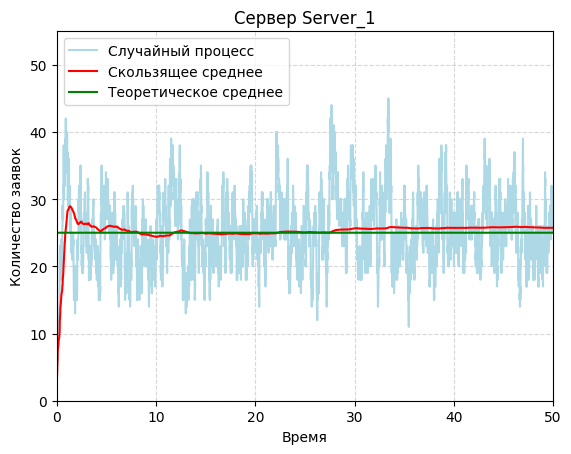

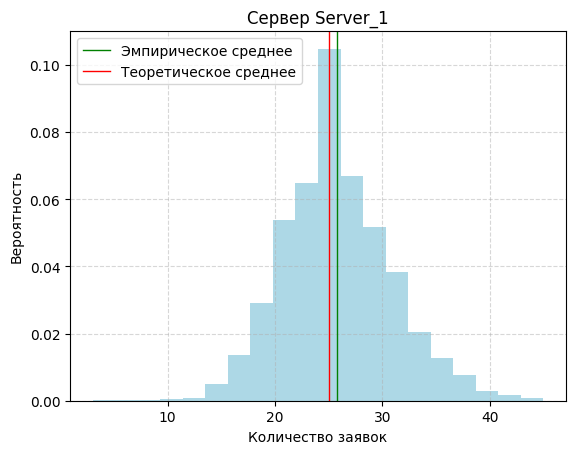

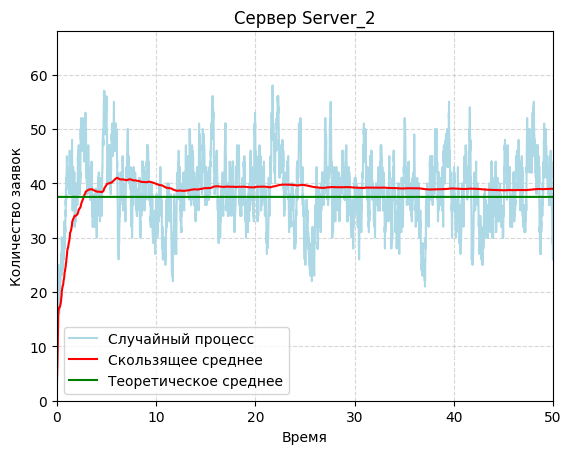

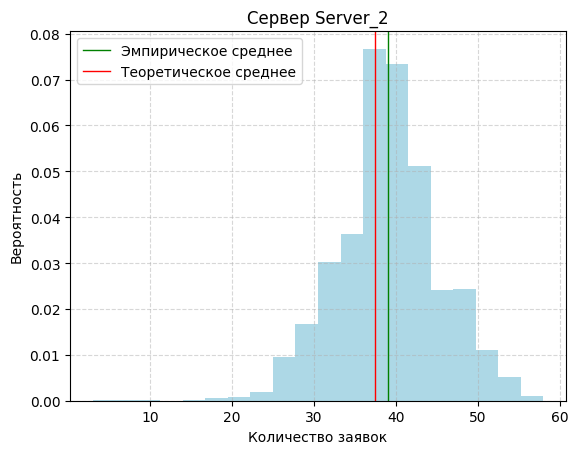

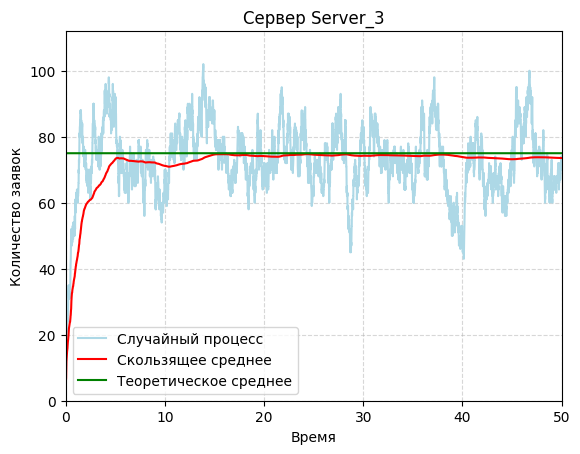

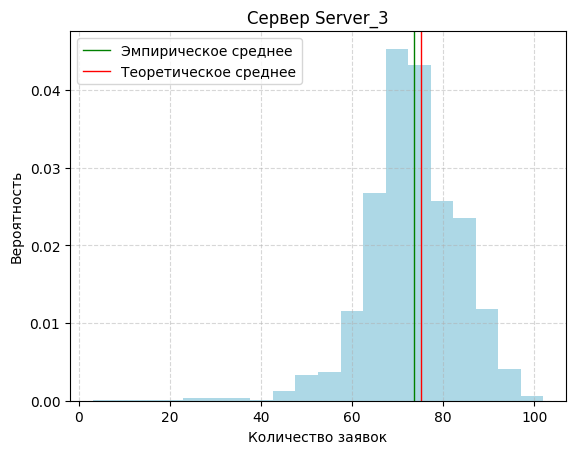

In [ ]:
import simpy
import matplotlib.pyplot as plt
import numpy as np
import random

# Константы
max_time = 50.0  # Общее время моделирования
mu_ =  [6, 4, 2]  # Среднее время обслуживания для каждого из трех серверов
lambda_ = [25, 50, 75]  # Средние интенсивности поступления заявок для трех потоков
capacities = [1000, 1500, 2000]  # Емкости серверов edge, fog, cloud


def process_request(env, server):
    with server['resource'].request() as req:
        yield req
        server['number_of_task'][env.now] = server['resource'].count
        server['moving_average'][env.now] = sum(server['number_of_task'].values()) / len(server['number_of_task'].values())
        service_time = random.expovariate(server['mu'])
        yield env.timeout(service_time)
        server['number_of_task'][env.now] = server['resource'].count
        server['moving_average'][env.now] = sum(server['number_of_task'].values()) / len(server['number_of_task'].values())


def generate_requests(env, server, stream_lambda):
    while True:
        c = process_request(env, server)
        env.process(c)
        inter_arrival_time = random.expovariate(stream_lambda)
        yield env.timeout(inter_arrival_time)


def run_simulation(max_time, mu_, lambda_, capacities):
    print('System M|M|inf with three servers')
    env = simpy.Environment()
    servers = []

    for i, capacity in enumerate(capacities):
        server_name = f'Server_{i + 1}'
        resource = simpy.Resource(env, capacity=capacity)
        number_of_task = {}
        moving_average = {}
        servers.append({
            'name': server_name,
            'resource': resource,
            'number_of_task': number_of_task, # Словарь с количеством заявок по времени.
            'moving_average': moving_average, # Скользящее среднее количества заявок в системе
            'mu': mu_[i]
        })

    for stream_lambda in lambda_:
       for server in servers:
          env.process(generate_requests(env, server, stream_lambda))
    env.run(until=max_time)
    print('All done!')

    return env, servers


def plot_results(server, max_time, lambda_):
    plt.plot(server['number_of_task'].keys(), server['number_of_task'].values(), label='Случайный процесс', color='lightblue')
    plt.plot(server['moving_average'].keys(), server['moving_average'].values(), label='Скользящее среднее', color='red')
    plt.plot(server['number_of_task'].keys(), [np.sum(lambda_) / server['mu'] for _ in server['number_of_task'].keys()], label='Теоретическое среднее', color='green')
    plt.xlim(0, max_time)
    plt.ylim(0, max(server['number_of_task'].values()) + 10)
    plt.grid(linestyle='--', alpha=0.5)
    plt.xlabel('Время')
    plt.ylabel('Количество заявок')
    plt.title(f'Сервер {server["name"]}')
    plt.legend()
    plt.show()

    plt.hist(list(server['number_of_task'].values()), density=True, bins=20, color='lightblue')
    plt.axvline((np.mean(list(server['number_of_task'].values()))), color='green', linestyle='-', linewidth=1, label='Эмпирическое среднее')
    plt.axvline((np.sum(lambda_) / server['mu']), color='red', linestyle='-', linewidth=1, label='Теоретическое среднее')
    plt.xlabel('Количество заявок')
    plt.ylabel('Вероятность')
    plt.grid(linestyle='--', alpha=0.5)
    plt.title(f'Сервер {server["name"]}')
    plt.legend()
    plt.show()

env, servers = run_simulation(max_time, mu_, lambda_, capacities)


for server in servers:
    plot_results(server, max_time, lambda_)

System M|M|inf with three servers
All done!
System M|M|inf with three servers
All done!
System M|M|inf with three servers
All done!
{'Server_1': [26.41930797675647, 126.15959239454934, 247.79322730293856], 'Server_2': [38.35036300080667, 188.50084527451295, 374.844982592805], 'Server_3': [74.26872576365739, 371.2567649069197, 754.362188901944]}


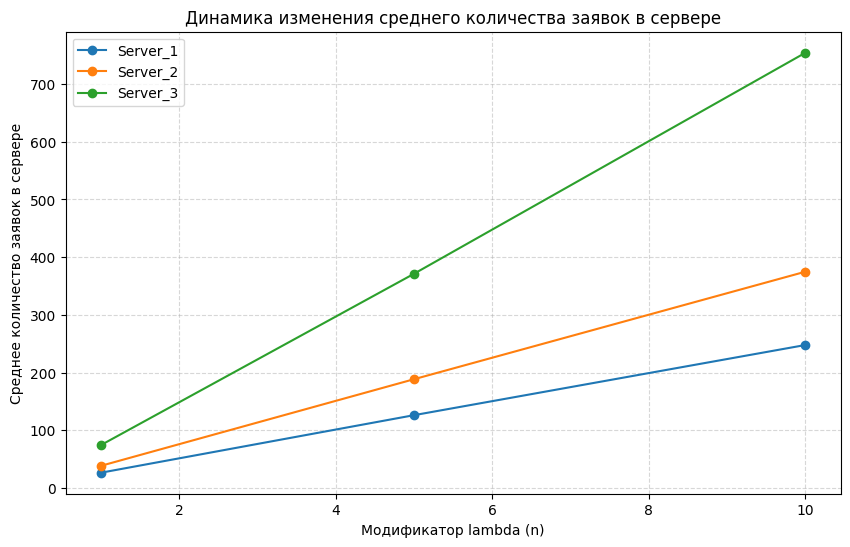

In [4]:
import simpy
import matplotlib.pyplot as plt
import numpy as np
import random

max_time = 50.0  # Общее время моделирования
mu_ =  [6, 4, 2]  # Среднее время обслуживания для каждого из трех серверов
lambda_ = [25, 50, 75]  # Средние интенсивности поступления заявок для трех потоков
capacities = [1000000, 1500000, 2000000]  # Емкости серверов edge, fog, cloud
n_values = [1, 5, 10]#np.arange(1.0, 40.0, 10.0) # Модификаторы для Лямбд


def process_request(env, server):
    with server['resource'].request() as req:
        yield req
        server['number_of_task'][env.now] = server['resource'].count
        server['moving_average'][env.now] = sum(server['number_of_task'].values()) / len(server['number_of_task'].values())
        service_time = random.expovariate(server['mu'])
        yield env.timeout(service_time)
        server['number_of_task'][env.now] = server['resource'].count
        server['moving_average'][env.now] = sum(server['number_of_task'].values()) / len(server['number_of_task'].values())


def generate_requests(env, server, stream_lambda):
    while True:
        c = process_request(env, server)
        env.process(c)
        inter_arrival_time = random.expovariate(stream_lambda)
        yield env.timeout(inter_arrival_time)


def run_simulation(max_time, mu_, lambda_, capacities):
    print('System M|M|inf with three servers')
    env = simpy.Environment()
    servers = []
    total_requests = {}

    for i, capacity in enumerate(capacities):
        server_name = f'Server_{i + 1}'
        resource = simpy.Resource(env, capacity=capacity)
        number_of_task = {}
        moving_average = {}
        servers.append({
            'name': server_name,
            'resource': resource,
            'number_of_task': number_of_task, # Словарь с количеством заявок по времени.
            'moving_average': moving_average, # Скользящее среднее количества заявок в системе
            'mu': mu_[i]
        })

    for stream_lambda in lambda_:
      for server in servers:
        env.process(generate_requests(env, server, stream_lambda))
    env.run(until=max_time)
    for server in servers:
      for key in server['number_of_task'].keys():
        if(key in total_requests.keys()):
          total_requests[key] += server['number_of_task'][key]
        else:
          total_requests[key] = server['number_of_task'][key]
    print('All done!')

    return env, servers, total_requests

def plot_results(server, max_time, lambda_):
    plt.plot(server['number_of_task'].keys(), server['number_of_task'].values(), label='Случайный процесс', color='lightblue')
    plt.plot(server['moving_average'].keys(), server['moving_average'].values(), label='Скользящее среднее', color='red')
    plt.plot(server['number_of_task'].keys(), [np.mean(lambda_) / server['mu'] for _ in server['number_of_task'].keys()], label='Теоретическое среднее', color='green')
    plt.xlim(0, max_time)
    plt.ylim(0, max(server['number_of_task'].values()) + 10)
    plt.grid(linestyle='--', alpha=0.5)
    plt.xlabel('Время')
    plt.ylabel('Количество заявок')
    plt.title(f'Сервер {server["name"]}')
    plt.legend()
    plt.show()

    plt.hist(list(server['number_of_task'].values()), density=True, bins=20, color='lightblue')
    plt.axvline((np.mean(list(server['number_of_task'].values()))), color='green', linestyle='-', linewidth=1, label='Эмпирическое среднее')
    plt.axvline((np.mean(lambda_) / server['mu']), color='red', linestyle='-', linewidth=1, label='Теоретическое среднее')
    plt.xlabel('Количество заявок')
    plt.ylabel('Вероятность')
    plt.grid(linestyle='--', alpha=0.5)
    plt.title(f'Сервер {server["name"]}')
    plt.legend()
    plt.show()

def generate_requests_per_n_system(max_time, mu_, lambda_, capacities, n_values): # среднее во всей системе
    plt.figure(figsize=(10, 6))
    requests_per_n = []

    for n in n_values:
      temp_lambda = list(lambda_)
      for l in range(len(temp_lambda)):
        temp_lambda[l] *= n
      env, servers, requests_system = run_simulation(max_time, mu_, temp_lambda, capacities)

      requests_per_n.append(np.mean(list(requests_system.values())))
      #for server in servers:
          # plot_results(server, max_time, lambda_)
    return requests_per_n
    #print(requests_per_n)


def generate_requests_per_n_servers(max_time, mu_, lambda_, capacities, n_values): # среднее для каждого сервера
    plt.figure(figsize=(10, 6))
    avg_requests_data = {f'Server_{i + 1}': [] for i in range(len(mu_))}

    for n in n_values:
      temp_lambda = list(lambda_)
      for l in range(len(temp_lambda)):
        temp_lambda[l] *= n
      env, servers, requests_system = run_simulation(max_time, mu_, temp_lambda, capacities)

      for server_index, server in enumerate(servers):
          avg_requests = np.mean(list(server['number_of_task'].values()))
          avg_requests_data[f'Server_{server_index + 1}'].append(avg_requests)

    print(avg_requests_data)

    for server_name, avg_requests_values in avg_requests_data.items():
        plt.plot(n_values, avg_requests_values, label=server_name, marker='o', linestyle='-')
    plt.grid(linestyle='--', alpha=0.5)
    plt.xlabel('Модификатор lambda (n)')
    plt.ylabel('Среднее количество заявок в сервере')
    plt.title('Динамика изменения среднего количества заявок в сервере')
    plt.legend()
    plt.show()

def plot_requests_dependency(max_time, mu_, lambda_, capacities, n_values):
    requests_per_n = generate_requests_per_n_system(max_time, mu_, lambda_, capacities, n_values)

    plt.plot(n_values, requests_per_n, marker='o')
    plt.grid(linestyle='--', alpha=0.5)
    plt.xlabel('Модификатор lambda (n)')
    plt.ylabel('Среднее количество заявок в сети (все серверы)')
    plt.title('Зависимость среднего количества заявок в сети от n')
    plt.show()

#plot_requests_dependency(max_time, mu_, lambda_, capacities, n_values)
generate_requests_per_n_servers(max_time, mu_, lambda_, capacities, n_values)